In [1]:
import pandas as pd
# For train/test split using professor id 
from sklearn.model_selection import GroupShuffleSplit 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.svm import SVC

## Cleaning Data

In [2]:
ratings_csv = pd.read_csv("MSU_ratings.csv")
ratings_csv

,prof_id,course,date,quality,difficulty,comments,thumbs_up,thumbs_down
0,790,MTH132,"Oct 9th, 2019",3.0,4.0,"Prof. Sagan is a nice, caring man, but he is n...",0,0
1,790,MTH317H,"Jan 3rd, 2014",5.0,3.0,AWESOME PROFESSOR!!!!!!!!!,0,0
2,790,MTH317H,"Nov 5th, 2013",5.0,4.0,Professor Sagan is really good math teacher. ...,0,0
3,790,MTH132,"Jan 11th, 2009",5.0,2.0,Excellent professor that was very clear in tea...,0,0
4,790,MATH254H,"Aug 10th, 2005",4.5,3.0,Awesome - made me want to become a Math major ...,0,0
...,...,...,...,...,...,...,...,...
13107,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Anning Jing is an absolute abomination of a pr...,0,0
13108,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Took IAH211B for university requirement credit...,0,0
13109,2650948,HA260,"Feb 2nd, 2022",1.0,5.0,Extremely vague. Skips around a LOT. Messy sli...,0,0
13110,2650948,IAH211B,"Apr 27th, 2021",1.0,5.0,This class has no reason for being harder than...,0,0


In [3]:
# Drop any ratings with no comments 
ratings_csv = ratings_csv.drop(ratings_csv[ratings_csv["comments"] == "No Comments"].index)
ratings_csv

,prof_id,course,date,quality,difficulty,comments,thumbs_up,thumbs_down
0,790,MTH132,"Oct 9th, 2019",3.0,4.0,"Prof. Sagan is a nice, caring man, but he is n...",0,0
1,790,MTH317H,"Jan 3rd, 2014",5.0,3.0,AWESOME PROFESSOR!!!!!!!!!,0,0
2,790,MTH317H,"Nov 5th, 2013",5.0,4.0,Professor Sagan is really good math teacher. ...,0,0
3,790,MTH132,"Jan 11th, 2009",5.0,2.0,Excellent professor that was very clear in tea...,0,0
4,790,MATH254H,"Aug 10th, 2005",4.5,3.0,Awesome - made me want to become a Math major ...,0,0
...,...,...,...,...,...,...,...,...
13107,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Anning Jing is an absolute abomination of a pr...,0,0
13108,2650948,IAH211B,"Apr 25th, 2022",1.0,5.0,Took IAH211B for university requirement credit...,0,0
13109,2650948,HA260,"Feb 2nd, 2022",1.0,5.0,Extremely vague. Skips around a LOT. Messy sli...,0,0
13110,2650948,IAH211B,"Apr 27th, 2021",1.0,5.0,This class has no reason for being harder than...,0,0


In [4]:
X = ratings_csv["comments"]
# 1 for positive ratings, 0 for negative
y = ratings_csv["quality"]>=3

## Data Visualization

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
    
def get_top_n_words(text, n, stop_words = False):
    if stop_words:
        vectorizer = CountVectorizer(stop_words="english")
    else:
        vectorizer = CountVectorizer()

    X = vectorizer.fit_transform(text)
    
    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names()

    # Calculate the word frequencies
    word_frequencies = X.toarray().sum(axis=0)
    
    # Sort the words by frequency in descending order
    sorted_words = sorted(zip(feature_names, word_frequencies), key=lambda x: x[1], reverse=True)

    # Get the top n words
    top_n_words = np.array(sorted_words[:n])
    return top_n_words

In [7]:
top_15_all = get_top_n_words(X, 15)
top_15_all_stop = get_top_n_words(X, 15, stop_words=True)

/home/ledan3/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Count')

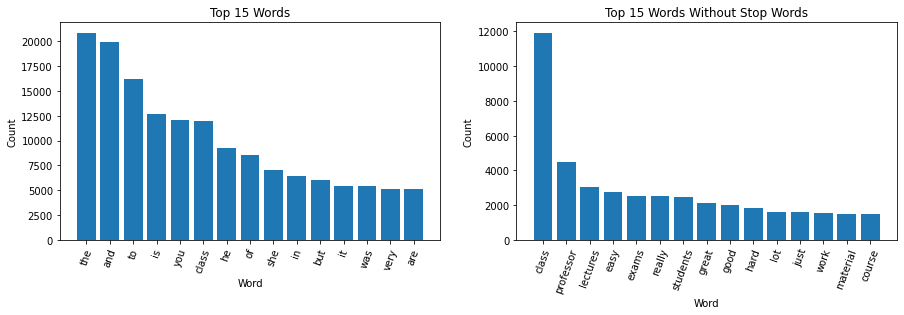

In [8]:
plt.figure(figsize=(15, 4)) 
plt.subplot(1,2,1)
plt.title("Top 15 Words")
plt.bar(top_15_all[:,0], top_15_all[:,1].astype('float64'))
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")


plt.subplot(1,2,2)
plt.title("Top 15 Words Without Stop Words")
plt.bar(top_15_all_stop[:,0], top_15_all_stop[:,1].astype('float64'))
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

In [9]:
# positive ratings 
top_15_pos = get_top_n_words(X[y], 15)
top_15_pos_stop = get_top_n_words(X[y], 15, stop_words=True)

In [10]:
# negative ratings 
top_15_neg = get_top_n_words(X[~y], 15)
top_15_neg_stop = get_top_n_words(X[~y], 15, stop_words=True)

Text(0, 0.5, 'Count')

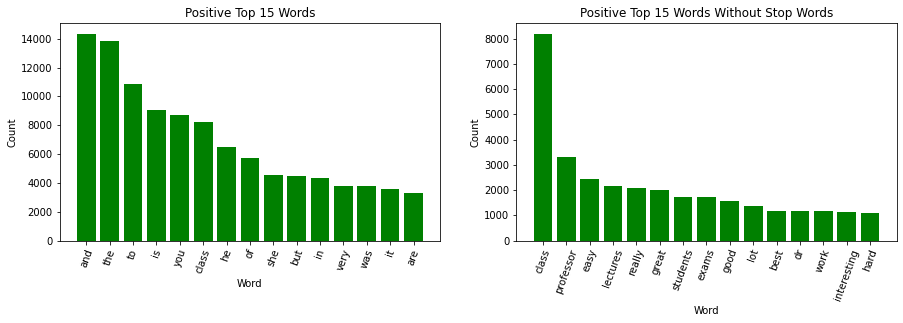

In [11]:
plt.figure(figsize=(15, 4)) 
plt.tight_layout()
plt.subplot(1,2,1)
plt.title("Positive Top 15 Words")
plt.bar(top_15_pos[:,0], top_15_pos[:,1].astype('float64'), color="g")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title("Positive Top 15 Words Without Stop Words")
plt.bar(top_15_pos_stop[:,0], top_15_pos_stop[:,1].astype('float64'), color="g")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

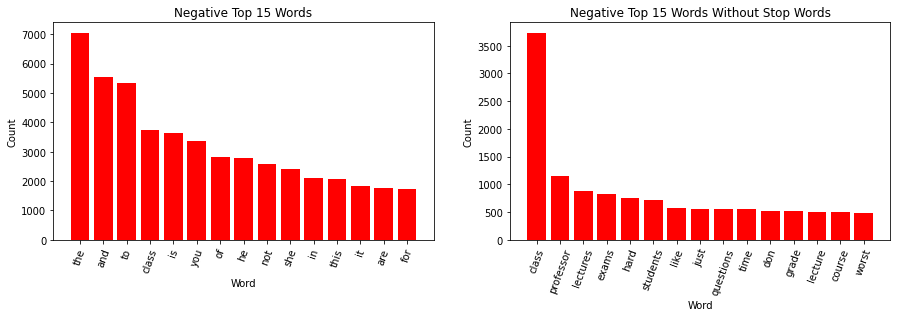

In [12]:
plt.figure(figsize=(15, 4)) 

plt.subplot(1,2,1)
plt.title("Negative Top 15 Words")
plt.bar(top_15_neg[:,0], top_15_neg[:,1].astype('float64'), color="r")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title("Negative Top 15 Words Without Stop Words")
plt.bar(top_15_neg_stop[:,0], top_15_neg_stop[:,1].astype('float64'), color="r")
plt.xticks(rotation=70)
plt.xlabel("Word")
plt.ylabel("Count")

## Train Test Split

In [13]:
# https://stackoverflow.com/questions/54797508/how-to-generate-a-train-test-split-based-on-a-group-id
# Train test split 70/30 based on professor id 
splitter = GroupShuffleSplit(test_size=.30, n_splits=2, random_state = 20)
split = splitter.split(ratings_csv, groups=ratings_csv['prof_id'])
train_idx, test_idx = next(split)
X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]

In [14]:
# Check that split was done properly 
print(f'Total Number of unique prof IDs: {len(pd.unique(ratings_csv["prof_id"]))}')
print(f'Number of unique prof IDs in train data: {len(pd.unique(ratings_csv.iloc[train_idx]["prof_id"]))}')
print(f'Number of unique prof IDs in test data: {len(pd.unique(ratings_csv.iloc[test_idx]["prof_id"]))}')

Total Number of unique prof IDs: 1662
Number of unique prof IDs in train data: 1163
Number of unique prof IDs in test data: 499


In [15]:
print(f"True split (based on number of ratings): {(len(X_train)/len(X))*100}% Train, {(len(X_test)/len(X))*100}% Test")

True split (based on number of ratings): 69.61006485895132% Train, 30.389935141048685% Test


## Preprocessing 

In [16]:
vectorizer = CountVectorizer()

In [17]:
X_train_vect = vectorizer.fit_transform(X_train)

In [18]:
X_test_vect = vectorizer.transform(X_test)

## SVM

In [19]:
svc = SVC()

In [20]:
svc.fit(X_train_vect,y_train)

SVC()

In [21]:
y_test_pred = svc.predict(X_test_vect)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
print(f'Accuracy Score: {accuracy_score(y_test, y_test_pred)}')
print(f'Precision Score: {precision_score(y_test, y_test_pred)}')
print(f'Recall Score: {recall_score(y_test, y_test_pred)}')
print(f'F1 Score: {f1_score(y_test, y_test_pred)}')

Accuracy Score: 0.8778606325533557
Precision Score: 0.8888101983002833
Recall Score: 0.9397229502059153
F1 Score: 0.913557779799818


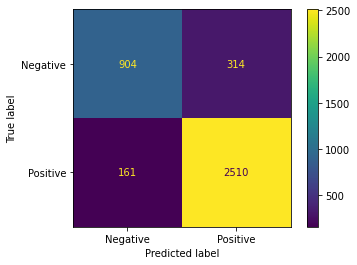

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()